<a href="https://colab.research.google.com/github/viniciusguirra/Projetos_Soulcode/blob/main/Caseairbnb_viniciusguirra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case AIRBNB  
   
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Período: Semana 6

Professor: Franciane Rodrigues

Aluno: Vinícius Guirra Oliveira

# Sobre os Dados:   


Este conjunto de dados contém dados de aluguel do Airbnb para cidades europeias, incluindo características e seus efeitos no preço. O conjunto de dados inclui vários recursos, como o preço total do anúncio, tipo de quarto, status do anfitrião (superhost ou não), comodidades e informações de localização que podem ser usadas para analisar os fatores que afetam os preços do Airbnb. Esses dados podem ajudar os viajantes a encontrar uma acomodação que satisfaça suas necessidades sem gastar mais do que o necessário. Ele também pode fornecer informações valiosas aos proprietários de empresas sobre como definir preços competitivos e otimizar suas listas para aumentar as reservas. Além disso, esses dados são úteis para investidores imobiliários que desejam entender as tendências de preços em diferentes cidades da Europa e tomar decisões informadas sobre investimentos imobiliários.

Link: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe

## Legenda de Dados:

realSum: o preço total do alojamento para duas pessoas e duas noites na EUROPA

room_type: tipo de quarto oferecido, como privado/compartilhado/casa inteira/apt

room_shared: se o quarto é compartilhado ou não

room_private: se o quarto é privativo ou não

person_capacity: número máximo de pessoas permitidas na propriedade

host_is_superhost: se o host é ou não um superhost

multi: seja para várias salas ou não

biz: seja para uso comercial ou familiar

cleanliness_rating: Classificação de limpeza  

guest_satisfaction_overall: satisfação geral do hóspede

bedrooms: número de quartos

dist: distância do centro da cidade em km

metro dist: distância da estação de metrô mais próxima

attr_index: índice de atração do local do anúncio

attr_index_norm: índice de atração normalizado (0-100)

rest_index: índice do restaurante do local da listagem

rest_index_norm: índice de restaurante normalizado (0-100)

lng: longitude

lat: latitude


# Problema de negócio: aplicação dos 5w

* O que: Analisar os determinantes dos preços do Airbnb. Identificar quais características das propriedades e localizações têm maior impacto nos preços.

* Quem: Compreender o comportamento dos anfitriões e hóspedes. Investigar se a categoria de superhost afeta os preços, se os tipos de quarto preferidos variam entre diferentes grupos de hóspedes, entre outros aspectos relacionados aos atores envolvidos.

* Onde: Avaliar a influência da localização nas variações de preço. Analisar se a proximidade do centro da cidade, a distância até a estação de metrô mais próxima ou outros fatores geográficos afetam os preços.

* Por quê?: Compreender se as avaliações de limpeza, a satisfação geral dos hóspedes ou outros fatores influenciam os preços de forma significativa

* Quando: As informações serão utilizadas de forma contínua pelos usuários finais. Os viajantes podem acessar os dados sempre que precisarem encontrar uma acomodação no Airbnb. Os proprietários de empresas podem usar as informações para ajustar seus preços e listagens regularmente. Os investidores imobiliários podem consultar os dados para obter insights sobre as tendências de preços ao tomar decisões de investimento a longo prazo

# Instalações e Importações

In [ ]:
!pip install gcsfs
!pip install pandera
#instalando e importando bibliotecas

In [ ]:
import os
import pandas as pd
import numpy as np
import pandera as pa
import matplotlib.pyplot as plt
from  google.cloud import storage
from google.colab import drive

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Extração

## Google Cloud

*  Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/judith-390016-06373d55a620.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('projetos-soul-code')
bucket.blob('airbnb.csv')
path = 'gs://projetos-soul-code/dados airbnb/dados brutos/airbnb.csv'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=';',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

In [ ]:
# drive.mount('/content/drive')

# Pré-Análise

In [ ]:
path = 'gs://projetos-soul-code/dados airbnb/dados brutos/airbnb.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
# visualização dos dados do dataframe
df

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0              0   194.033698     Private room        False          True   
1              1   344.245776     Private room        False          True   
2              2   264.101422     Private room        False          True   
3              3   433.529398     Private room        False          True   
4              4   485.552926     Private room        False          True   
...          ...          ...              ...          ...           ...   
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 2.0              False      1    0                10.0   
1                 4.0              False      0    0                 8.0   
2                 2.0              False      0    1                 9.0   
3                 4.0              False      0    1                 9.0   
4                 2.0               True      0    0                10.0   
...               ...                ...    ...  ...                 ...   
1098              2.0              False      0    0                10.0   
1099              2.0              False      1    0                10.0   
1100              2.0              False      1    0                10.0   
1101              4.0              False      0    0                 8.0   
1102              2.0              False      0    0                 8.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                           93.0         1  5.022964    2.539380   78.690379   
1                           85.0         1  0.488389    0.239404  631.176378   
2                           87.0         1  5.748312    3.651621   75.275877   
3                           90.0         2  0.384862    0.439876  493.272534   
4                           98.0         1  0.544738    0.318693  552.830324   
...                          ...       ...       ...         ...         ...   
1098                       100.0         1  2.375833    1.436054  181.198355   
1099                        90.0         1  4.719736    0.322263  108.024880   
1100                        92.0         1  0.598355    0.751993  440.476515   
1101                        84.0         5  1.943020    0.388532  257.948105   
1102                        90.0         1  0.280204    0.516217  533.962653   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  
0            4.166708   98.253896         6.846473  4.90569  52.41772  
1           33.421209  837.280757        58.342928  4.90005  52.37432  
2            3.985908   95.386955         6.646700  4.97512  52.36103  
3           26.119108  875.033098        60.973565  4.89417  52.37663  
4           29.272733  815.305740        56.811677  4.90051  52.37508  
...               ...         ...              ...      ...       ...  
1098         9.594573  225.304203        15.699521  4.85869  52.37677  
1099         5.719989  134.775277         9.391335  4.83611  52.34910  
1100        23.323524  625.947562        43.616927  4.88897  52.37798  
1101        13.658524  336.589237        23.454022  4.90688  52.35794  
1102        28.273677  807.492307        56.267226  4.89295  52.37575  

[1103 rows x 20 columns]

In [ ]:
# Visualização dos dados começando pelo cabeçalho
df.head()

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0              False      1    0                10.0   
1              4.0              False      0    0                 8.0   
2              2.0              False      0    1                 9.0   
3              4.0              False      0    1                 9.0   
4              2.0               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [ ]:
# Visualização do df começando pelo final
df.tail()

Unnamed: 0      realSum        room_type  room_shared  room_private  \
1098        1098  2486.115342  Entire home/apt        False         False   
1099        1099   233.637194     Private room        False          True   
1100        1100   317.062311     Private room        False          True   
1101        1101  1812.855904  Entire home/apt        False         False   
1102        1102   258.008577      Shared room         True         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
1098              2.0              False      0    0                10.0   
1099              2.0              False      1    0                10.0   
1100              2.0              False      1    0                10.0   
1101              4.0              False      0    0                 8.0   
1102              2.0              False      0    0                 8.0   

      guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
1098                       100.0         1  2.375833    1.436054  181.198355   
1099                        90.0         1  4.719736    0.322263  108.024880   
1100                        92.0         1  0.598355    0.751993  440.476515   
1101                        84.0         5  1.943020    0.388532  257.948105   
1102                        90.0         1  0.280204    0.516217  533.962653   

      attr_index_norm  rest_index  rest_index_norm      lng       lat  
1098         9.594573  225.304203        15.699521  4.85869  52.37677  
1099         5.719989  134.775277         9.391335  4.83611  52.34910  
1100        23.323524  625.947562        43.616927  4.88897  52.37798  
1101        13.658524  336.589237        23.454022  4.90688  52.35794  
1102        28.273677  807.492307        56.267226  4.89295  52.37575

In [ ]:
# Visualização do df de forma aleatória
# é um método da biblioteca Pandas em Python que é usado para retornar uma amostra aleatória de linhas de um DataFrame

df.sample(5)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
29           29  270.428608     Private room        False          True   
118         118  196.611440     Private room        False          True   
533         533  393.457221  Entire home/apt        False         False   
802         802  639.983128  Entire home/apt        False         False   
367         367  196.611440     Private room        False          True   

     person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
29               4.0               True      0    0                10.0   
118              2.0               True      1    0                10.0   
533              2.0              False      0    0                10.0   
802              4.0              False      0    1                10.0   
367              2.0              False      1    0                 9.0   

     guest_satisfaction_overall  bedrooms       dist  metro_dist  attr_index  \
29                         98.0         1   4.885478    1.094837   91.666212   
118                        97.0         1  10.723483    0.454563   42.645245   
533                       100.0         1   1.871116    1.529884  190.017772   
802                       100.0         2   4.220556    0.312022  101.455154   
367                        84.0         1   4.452913    0.615093  101.205235   

     attr_index_norm  rest_index  rest_index_norm      lng       lat  
29          4.853787  114.674343         7.990673  4.82174  52.37781  
118         2.258094   53.036138         3.695634  4.99394  52.29924  
533        10.061567  250.627528        17.464087  4.88728  52.38967  
802         5.372118  135.158627         9.418048  4.83529  52.38693  
367         5.358884  126.082521         8.785611  4.82782  52.37562

In [ ]:
# Tamanho do df
df.shape

(1103, 20)

In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Contar a quantidade de observações
df.count()

Unnamed: 0                    1103
realSum                       1103
room_type                     1103
room_shared                   1103
room_private                  1103
person_capacity               1103
host_is_superhost             1103
multi                         1103
biz                           1103
cleanliness_rating            1103
guest_satisfaction_overall    1103
bedrooms                      1103
dist                          1103
metro_dist                    1103
attr_index                    1103
attr_index_norm               1103
rest_index                    1103
rest_index_norm               1103
lng                           1103
lat                           1103
dtype: int64

In [ ]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Backup local do df
dfback1 = df.copy()

# Transformação

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise
*  Verificação e tratamento de valores (ou observações) únicos e inconsistentes
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados via pandera

## Escolher as possíveis colunas importantes para a análise

In [ ]:
'''
Após visualizarmos o dataframe podemos considerar em excluir algumas colunas.
A coluna Unnamed que está trazendo a mesma informação do index.
Também podemos excluir room_shared e room_private, pois já possuímos a coluna room_type para identificar o tipo de quarto,
essas colunas podem ser redundantes.
Por último a coluna multi que traz a informação sobre ter vários quartos ou não,
sendo que esta informação já está capturada em outras colunas, como bedrooms,
essa coluna pode ser redundante.
'''
df.drop(['Unnamed: 0',
         'room_shared',
         'room_private',
         'multi'],axis=1, inplace=True)

In [ ]:
#verificando se excluimos as colunas
df.dtypes

realSum                       float64
room_type                      object
person_capacity               float64
host_is_superhost                bool
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

## Verificação e tratamento de valores (ou observações) únicos e inconsistentes

In [ ]:
# Verificar valores inconsistentes em cada coluna
columns = ['realSum', 'room_type','person_capacity', 'host_is_superhost',
           'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
           'attr_index', 'attr_index_norm', 'rest_index', 'attr_index_norm', 'lng', 'lat']

for column in columns:
    unique_values = sorted(df[column].unique())
    print(f"Valores únicos para a coluna {column}:")
    print(unique_values)
    print()


Valores únicos para a coluna realSum:
[128.88711831837463, 143.65055187120663, 144.82225294682823, 161.9290886509034, 165.67853209289248, 167.3189135987627, 175.75516134323811, 177.16120263398403, 178.0985634944813, 180.20762543060016, 181.8480069364704, 184.4257493028379, 188.17519274482692, 191.6902959716917, 192.8619970473133, 194.03369812293488, 196.6114404893024, 198.9548426405456, 199.89220350104284, 201.53258500691305, 202.70428608253465, 204.1103273732805, 205.2820284489021, 206.4537295245237, 208.7971316757669, 209.03147189089125, 210.2031729665128, 213.95261640850188, 215.12431748412348, 217.70205985049097, 218.63942071098825, 218.8737609261125, 221.2171630773557, 221.45150329248003, 225.66962716471772, 227.310008670588, 228.71604996133388, 230.82511189745276, 232.23115318819865, 233.63719447894456, 234.57455533944184, 237.85531835118223, 238.3239987814309, 239.4956998570525, 239.7300400721768, 241.1360813629227, 241.83910200829567, 242.07344222342, 243.2451432990416, 244.416

In [ ]:
# mais uma verificação
df.dtypes


realSum                       float64
room_type                      object
person_capacity               float64
host_is_superhost                bool
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

## Verificação de duplicadas

In [ ]:
# Verificar valores duplicados em todas as colunas do DataFrame
duplicados = df.duplicated()
total_duplicados = duplicados.sum()

print(f"Total de valores duplicados: {total_duplicados}")
print("Linhas duplicadas:")
print(df[duplicados])


Total de valores duplicados: 0
Linhas duplicadas:
Empty DataFrame
Columns: [realSum, room_type, person_capacity, host_is_superhost, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat]
Index: []


## Verificação e tratamento de valores nulos

In [ ]:
# Verificar dados Nulos, ausentes, etc - isnull()
df.isna().sum()

realSum                       0
room_type                     0
person_capacity               0
host_is_superhost             0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

realSum                       0.0
room_type                     0.0
person_capacity               0.0
host_is_superhost             0.0
biz                           0.0
cleanliness_rating            0.0
guest_satisfaction_overall    0.0
bedrooms                      0.0
dist                          0.0
metro_dist                    0.0
attr_index                    0.0
attr_index_norm               0.0
rest_index                    0.0
rest_index_norm               0.0
lng                           0.0
lat                           0.0
dtype: float64


In [ ]:
#visualizar informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     1103 non-null   float64
 1   room_type                   1103 non-null   object 
 2   person_capacity             1103 non-null   float64
 3   host_is_superhost           1103 non-null   bool   
 4   biz                         1103 non-null   int64  
 5   cleanliness_rating          1103 non-null   float64
 6   guest_satisfaction_overall  1103 non-null   float64
 7   bedrooms                    1103 non-null   int64  
 8   dist                        1103 non-null   float64
 9   metro_dist                  1103 non-null   float64
 10  attr_index                  1103 non-null   float64
 11  attr_index_norm             1103 non-null   float64
 12  rest_index                  1103 non-null   float64
 13  rest_index_norm             1103 

## Tradução/Renomeação

In [ ]:
# traduzir colunas
df.rename(columns={'realSum':'preço_para_duas_pessoas_e_duas_noites_na_europa',
                   'room_type':'tipo_quarto',
                   'person_capacity':'capacidade',
                   'host_is_superhost':'superhost',
                   'biz': 'uso_comercial_ou_familiar',
                   'cleanliness_rating':'nota_limpeza',
                   'guest_satisfaction_overall':'satisfação',
                   'bedrooms':'banheiros',
                   'dist':'distância_do_centro',
                   'metro_dist':'distância_da_estação_de_metrô',
                   'attr_index': 'atração_do_local_do_anúncio',
                   'attr_index_norm': 'índice_de_atração_normalizado_(0-100)',
                   'rest_index':'índice_do_restaurante_do_local_da_listagem',
                   'rest_index_norm': 'índice_de_restaurante_normalizado_(0-100)',
                   'lat':'latitude',
                   'lng':'longitude'
                   },
                    inplace = True)

In [ ]:
# visualizar traduções
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   preço_para_duas_pessoas_e_duas_noites_na_europa  1103 non-null   float64
 1   tipo_quarto                                      1103 non-null   object 
 2   capacidade                                       1103 non-null   float64
 3   superhost                                        1103 non-null   bool   
 4   uso_comercial_ou_familiar                        1103 non-null   int64  
 5   nota_limpeza                                     1103 non-null   float64
 6   satisfação                                       1103 non-null   float64
 7   banheiros                                        1103 non-null   int64  
 8   distância_do_centro                              1103 non-null   float64
 9   distância_da_estação_de_metrô 

### Traduzir categorias da coluna "tipo_quarto"

In [ ]:
# Tradução das categorias dentro das colunas
df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'casa inteira/apto'
df.loc[df.tipo_quarto == 'Private room',    ['tipo_quarto']] = 'quarto privado'
df.loc[df.tipo_quarto == 'Shared room',     ['tipo_quarto']] = 'quarto compartilhado'

In [ ]:
df['tipo_quarto'].unique()

array(['quarto privado', 'casa inteira/apto', 'quarto compartilhado'],
      dtype=object)

## Transformação de tipos adequados dos dados

In [ ]:
# Todos os dados estão adequados.

## Garantia de qualidade e integridade dos dados via pandera

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({
    "preço_para_duas_pessoas_e_duas_noites_na_europa": pa.Column(pa.Float),
    "tipo_quarto": pa.Column(pa.String),
    "capacidade": pa.Column(pa.Float),
    "superhost": pa.Column(pa.Bool),
    "uso_comercial_ou_familiar": pa.Column(pa.Int),
    "nota_limpeza": pa.Column(pa.Float),
    "satisfação": pa.Column(pa.Float),
    "banheiros": pa.Column(pa.Int),
    "distância_do_centro": pa.Column(pa.Float),
    "distância_da_estação_de_metrô": pa.Column(pa.Float),
    "atração_do_local_do_anúncio": pa.Column(pa.Float),
    "índice_de_atração_normalizado_(0-100)": pa.Column(pa.Float),
    "índice_do_restaurante_do_local_da_listagem": pa.Column(pa.Float),
    "índice_de_restaurante_normalizado_(0-100)": pa.Column(pa.Float),
    "longitude": pa.Column(pa.Float),
    "latitude": pa.Column(pa.Float)
})


# Validar o DataFrame
schema.validate(df)


preço_para_duas_pessoas_e_duas_noites_na_europa           tipo_quarto  \
0                                          194.033698        quarto privado   
1                                          344.245776        quarto privado   
2                                          264.101422        quarto privado   
3                                          433.529398        quarto privado   
4                                          485.552926        quarto privado   
...                                               ...                   ...   
1098                                      2486.115342     casa inteira/apto   
1099                                       233.637194        quarto privado   
1100                                       317.062311        quarto privado   
1101                                      1812.855904     casa inteira/apto   
1102                                       258.008577  quarto compartilhado   

      capacidade  superhost  uso_comercial_ou_familiar  nota_limpeza  \
0            2.0      False                          0          10.0   
1            4.0      False                          0           8.0   
2            2.0      False                          1           9.0   
3            4.0      False                          1           9.0   
4            2.0       True                          0          10.0   
...          ...        ...                        ...           ...   
1098         2.0      False                          0          10.0   
1099         2.0      False                          0          10.0   
1100         2.0      False                          0          10.0   
1101         4.0      False                          0           8.0   
1102         2.0      False                          0           8.0   

      satisfação  banheiros  distância_do_centro  \
0           93.0          1             5.022964   
1           85.0          1             0.488389   
2           87.0          1             5.748312   
3           90.0          2             0.384862   
4           98.0          1             0.544738   
...          ...        ...                  ...   
1098       100.0          1             2.375833   
1099        90.0          1             4.719736   
1100        92.0          1             0.598355   
1101        84.0          5             1.943020   
1102        90.0          1             0.280204   

      distância_da_estação_de_metrô  atração_do_local_do_anúncio  \
0                          2.539380                    78.690379   
1                          0.239404                   631.176378   
2                          3.651621                    75.275877   
3                          0.439876                   493.272534   
4                          0.318693                   552.830324   
...                             ...                          ...   
1098                       1.436054                   181.198355   
1099                       0.322263                   108.024880   
1100                       0.751993                   440.476515   
1101                       0.388532                   257.948105   
1102                       0.516217                   533.962653   

      índice_de_atração_normalizado_(0-100)  \
0                                  4.166708   
1                                 33.421209   
2                                  3.985908   
3                                 26.119108   
4                                 29.272733   
...                                     ...   
1098                               9.594573   
1099                               5.719989   
1100                              23.323524   
1101                              13.658524   
1102                              28.273677   

      índice_do_restaurante_do_local_da_listagem  \
0                                      98.253896   
1                                     837.280757   
2                            

#Backup2

In [ ]:
# Backup local do df tratado
dfback2 = df.copy()

# Carregamento

In [ ]:
# Google Drive - Utilizar se for o rotulo padrão
# df.to_csv('/content/drive/MyDrive/Soulcode/case airbnb /airbnb_tratado.csv',index=False)

In [ ]:
# Google Cloud / carregando o dataframe tratado
df.to_csv('gs://projetos-soul-code/dados airbnb/dados tratados/airbnb_tratado.csv', index=False)

# Colunas a serem utilizadas

Após Pré-analise e transformação dos dados, as colunas a serem utilizadas são:

preço_para_duas_pessoas_e_duas_noites_na_europa    
tipo_quarto                                         
capacidade                                         
superhost                                             
uso_comercial_ou_familiar                            
nota_limpeza                                       
satisfação                                         
banheiros                                            
distância_do_centro                                   
distância_da_estação_de_metrô                      
atração_do_local_do_anúncio                        
índice_de_atração_normalizado_(0-100)          
índice_do_restaurante_do_local_da_listagem         
índice_de_restaurante_normalizado_(0-100)          
longitude                                          
latitude

# Análises

* Busca ou Localização;
* Filtro;
* GroupBy;
* Combinando filtro e agrupamento;
* Resumo de estatística;
   Média
   Mediana
   Moda
   Quartis
   Desvio-padrão
* Visualização pelo Pandas e Matplotlib;
   Barras
   Setores
   Boxplot
   Dispersão
   Histograma

### Busca ou Localização

In [ ]:
df_busca_metro = df.loc[df['distância_da_estação_de_metrô'] > 4]
print(df_busca_metro)
# Filtra anúncios com mais de 4 km da estação de metrô

     preço_para_duas_pessoas_e_duas_noites_na_europa        tipo_quarto  \
39                                        504.065803     quarto privado   
277                                       552.808567  casa inteira/apto   
514                                       295.268671     quarto privado   
629                                       177.161203     quarto privado   
738                                       313.312868     quarto privado   

     capacidade  superhost  uso_comercial_ou_familiar  nota_limpeza  \
39          2.0      False                          0           9.0   
277         4.0      False                          0           9.0   
514         2.0      False                          0          10.0   
629         3.0      False                          1           8.0   
738         3.0       True                          0          10.0   

     satisfação  banheiros  distância_do_centro  \
39         96.0          1             6.411657   
277        96.0     

### Filtro

In [ ]:
# Filtro para mais de 90% de satisfação

ft_alta_satisfação = (df.satisfação >= 99)
print(ft_alta_satisfação)

0       False
1       False
2       False
3       False
4       False
        ...  
1098     True
1099    False
1100    False
1101    False
1102    False
Name: satisfação, Length: 1103, dtype: bool


In [ ]:

filtro_numerico =(df.satisfação <= 1) # Exemplo de filtro por nível de satisfação maior ou igual a 90

print(filtro_numerico)


0       False
1       False
2       False
3       False
4       False
        ...  
1098    False
1099    False
1100    False
1101    False
1102    False
Name: satisfação, Length: 1103, dtype: bool


### Groupby

In [ ]:
# Agrupamento por uma coluna e cálculo da média
agrupamento = df.groupby('tipo_quarto')['preço_para_duas_pessoas_e_duas_noites_na_europa'].mean()
print(agrupamento)


tipo_quarto
casa inteira/apto       733.179099
quarto compartilhado    280.973918
quarto privado          366.764655
Name: preço_para_duas_pessoas_e_duas_noites_na_europa, dtype: float64


###Combinando filtro e agrupamento

In [ ]:
# Agrupando por tipo de quarto e calculando a média da satisfação
grupo_tipo_quarto = df.groupby('tipo_quarto')['satisfação'].mean()  # Calcula a média da satisfação por tipo de quarto
print(grupo_tipo_quarto)


tipo_quarto
casa inteira/apto       95.211896
quarto compartilhado    92.833333
quarto privado          93.561717
Name: satisfação, dtype: float64


### Resumo de estatística; Média Mediana Moda Quartis Desvio-padrão

In [ ]:
# Metodo descritivo para todas as colunas do df
df.describe()

preço_para_duas_pessoas_e_duas_noites_na_europa   capacidade  \
count                                      1103.000000  1103.000000   
mean                                        545.020526     2.792384   
std                                         416.974314     1.044151   
min                                         128.887118     2.000000   
25%                                         309.797764     2.000000   
50%                                         430.248635     2.000000   
75%                                         657.324303     4.000000   
max                                        7782.907225     6.000000   

       uso_comercial_ou_familiar  nota_limpeza   satisfação    banheiros  \
count                1103.000000   1103.000000  1103.000000  1103.000000   
mean                    0.115141      9.461469    94.362647     1.282865   
std                     0.319336      0.798201     6.089691     0.740178   
min                     0.000000      4.000000    20.000000     0.000000   
25%                     0.000000      9.000000    92.000000     1.000000   
50%                     0.000000     10.000000    96.000000     1.000000   
75%                     0.000000     10.000000    98.000000     2.000000   
max                     1.000000     10.000000   100.000000     5.000000   

       distância_do_centro  distância_da_estação_de_metrô  \
count          1103.000000                    1103.000000   
mean              2.841621                       1.089439   
std               2.123245                       0.836546   
min               0.015059                       0.036530   
25%               1.302058                       0.462983   
50%               2.341366                       0.856010   
75%               3.648138                       1.510629   
max              11.187100                       4.411915   

       atração_do_local_do_anúncio  índice_de_atração_normalizado_(0-100)  \
count                  1103.000000                            1103.000000   
mean                    271.009899                              14.350154   
std                     197.046890                              10.433764   
min                      40.931415                               2.167346   
25%                     127.909866                               6.772912   
50%                     208.180311                              11.023286   
75%                     386.442241                              20.462373   
max                    1888.550428                             100.000000   

       índice_do_restaurante_do_local_da_listagem  \
count                                 1103.000000   
mean                                   341.541187   
std                                    236.611077   
min                                     50.877318   
25%                                    163.469245   
50%                                    260.257028   
75%                                    469.290623   
max                                   1435.102401   

       índice_de_restaurante_normalizado_(0-100)    longitude     latitude  
count                                1103.000000  1103.000000  1103.000000  
mean                                   23.799081     4.891158    52.364858  
std                                    16.487400     0.038882     0.019467  
min                                     3.545205     4.775500    52.291100  
25%                                    11.390772     4.871000    52.354580  
50%                                    18.135084     4.890010    52.365590  
75%                                    32.700846     4.907315    52.375260  
max                                   100.000000     5.010770    52.423480

In [ ]:
# Apenas a moda não vem no describe, sendo assim:
# Moda
moda = df['satisfação'].mode()
print("Moda:", moda)

Moda: 0    100.0
Name: satisfação, dtype: float64


In [ ]:
# Moda
moda = df['capacidade'].mode()
print("Moda:", moda)

Moda: 0    2.0
Name: capacidade, dtype: float64


### Visualização pelo Pandas e Matplotlib; Barras Setores Boxplot Dispersão Histograma

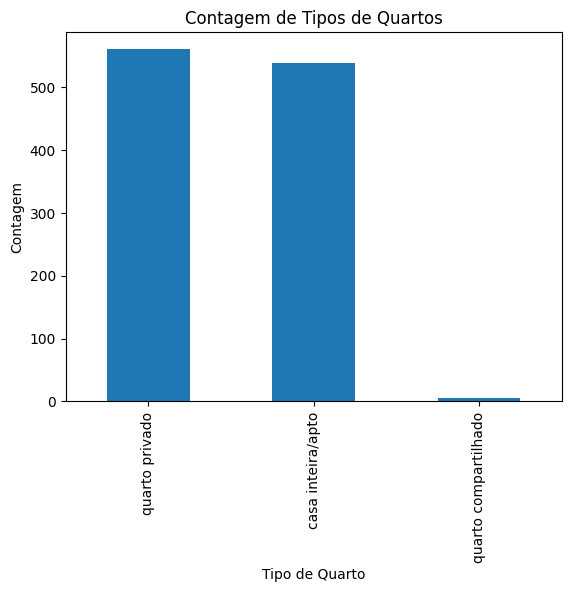

In [ ]:
# Gráfico de barras

df['tipo_quarto'].value_counts().plot(kind='bar')

# Configurar o título e os rótulos dos eixos
plt.title('Contagem de Tipos de Quartos')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()
# destacam-se os poucos quartos compartilhados

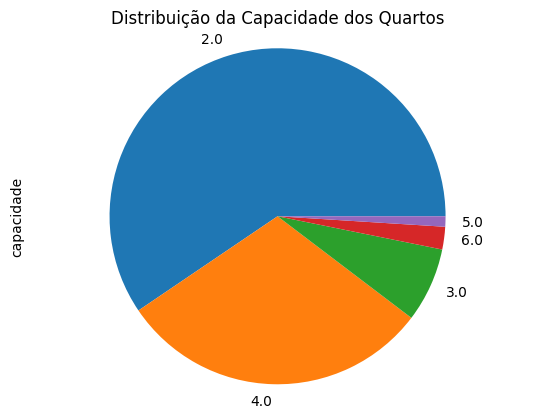

In [ ]:
# Contagem de quartos por capacidade
contagem_capacidade = df['capacidade'].value_counts()

# Plotando o gráfico de setores
contagem_capacidade.plot(kind='pie')

# Configurações do gráfico
plt.axis('equal')
plt.title('Distribuição da Capacidade dos Quartos')
plt.show()


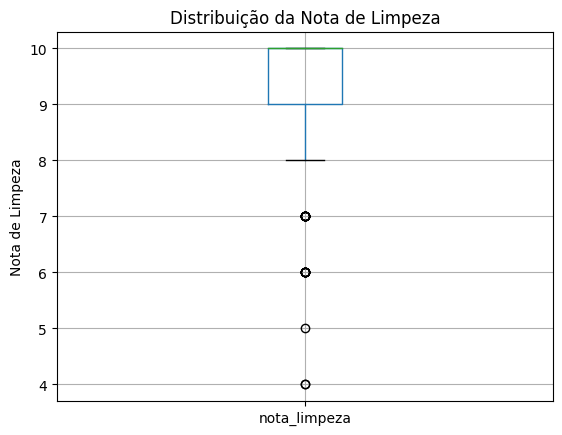

In [ ]:
# Boxplot da nota de limpeza
df.boxplot(column='nota_limpeza')

# Configurações do gráfico
plt.ylabel('Nota de Limpeza')
plt.title('Distribuição da Nota de Limpeza')
plt.show()

# nota-se uma concentração em notas altas

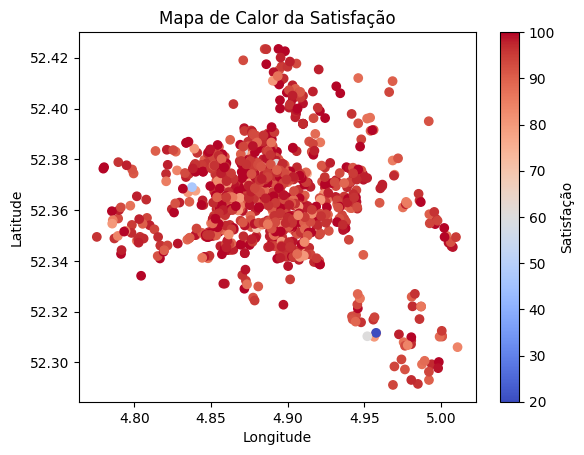

In [ ]:
# Gráfico de Dispersão (Mapa de Calor)
plt.scatter(df['longitude'], df['latitude'], c=df['satisfação'], cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mapa de Calor da Satisfação')
plt.colorbar(label='Satisfação')
plt.show()
# note apenas 2 pequenos pontos azuis de satisfação baixa.
# o nível de satisfação é bastante alto, mas tem sua concentração no centro do mapa.

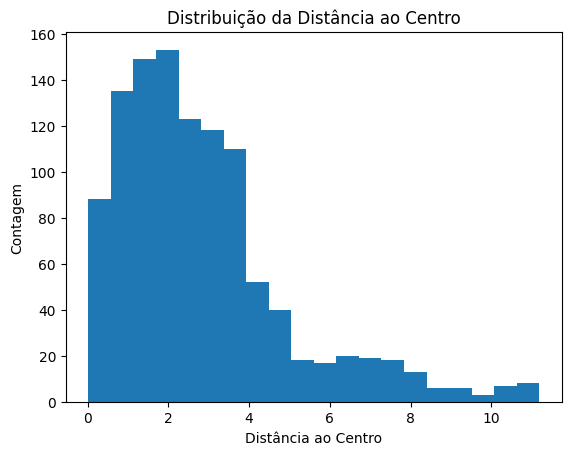

In [ ]:
# Histograma das distâncias ao centro
plt.hist(df['distância_do_centro'], bins=20)

# Configurações do gráfico
plt.xlabel('Distância ao Centro')
plt.ylabel('Contagem')
plt.title('Distribuição da Distância ao Centro')
plt.show()
# alta concentração no centro da cidade.

# Adicional Correlações

Fonte: https://medium.com/omixdata/estat%C3%ADstica-an%C3%A1lise-de-correla%C3%A7%C3%A3o-usando-python-e-r-d68611511b5a

In [ ]:
import seaborn as sn
# análise de correlação

correlation = df.corr()

<Axes: >

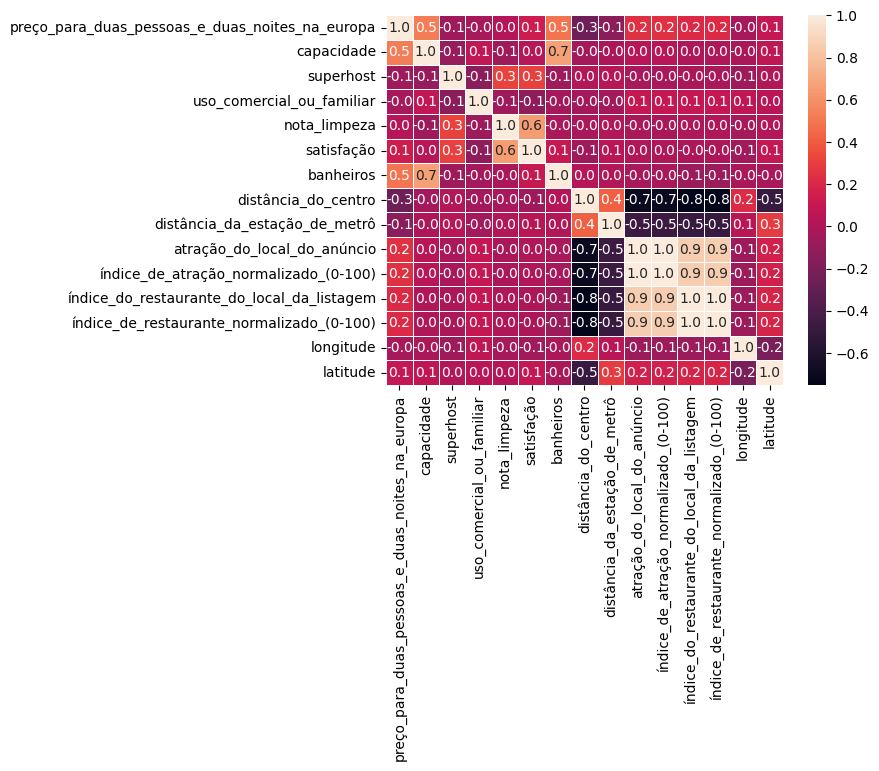

In [ ]:
# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [ ]:
'''
Ao estabelecermos as correlações, nota-se que:
Preço tem um correlação forte com capacidade e banheiros;
Capacidade tem uma correlação forte com número de banheiros;
Superhost e uso comercial ou familiar não apresentaram nenhuma correlação considerável;
Nota de limpeza apresentou uma correlação forte com satisfação;
distância do centro tem uma correlação muito forte de forma negativa com atração do local do anúncio,
ou seja o centro desta cidade atrai mais aluguéis;
distância do centro tem uma correlação ainda mais forte de forma negativa quando é relacionada com índice do restaurante;
distância da estação do metrô tem uma correlação moderada tanto para atração do local do anúncio como indíce dos restaurantes
atração do local do anúncio tem um correlação muito forte indíce dos restaurantes, podemos concluir que a atração do anúncio é
 extremamente ligada a proximidade com algum restaurante, favorecendo o turismo gastronômico.
'''

'\nAo estabelercermos as correlações, nota-se que:\nPreço tem um correlação forte com capacidade e banheiros;\nCapacidade tem uma correlação forte com número de banheiros;\nSuperhost e uso comercial ou familiar não apresentaram nenhuma correlação considerável;\nNota de limpeza apresentou uma correlação forte com satisfação;\ndistância do centro tem uma correlação muito forte de forma negativa com atração do local do anúncio, \nou seja o centro desta cidade atrai mais aluguéis;\ndistância do centro tem uma correlação ainda mais forte de forma negativa quando é relacionada com índice do restaurante;\ndistância da estação do metrô tem uma correlação moderada tanto para atração do local do anúncio como indíce dos restaurantes\natração do local do anúncio tem um correlação muito forte indíce dos restaurantes, podemos concluir que a atração do anúncio é\n extremammente ligada a proximidade com algum restaurante, favorecendo o turismo gastronômico.\n'

# Adicional PyGWalker

PyGWalker (pronunciado como "Pig Walker") é um portmanteau peculiar de "ligação Python de Graphic Walker". Ele funde o Jupyter Notebook (ou outros notebooks baseados em jupyter) com o Graphic Walker(abre em uma nova aba). Os cientistas de dados agora podem criar visualizações de dados usando arrastar e soltar, em vez de usar códigos Python!
Fonte:
https://docs.kanaries.net/pygwalker
https://dadosaocubo.com/tableau-python-pygwalker/

In [ ]:
!pip install pygwalker
import pygwalker as pyg
# intalando e importando o pygwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.0 MB/s eta 0:00:00


In [ ]:
gwalker = pyg.walk(df)

# Adicional Mapa de visualização

Fonte:
Chatgpt
Documentação: https://geopandas.org/en/stable/
documentaçãp: https://python-visualization.github.io/folium/

In [ ]:
import geopandas as gpd
import folium

# Criar um GeoDataFrame a partir do DataFrame original
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Obter as coordenadas centrais para definir o centro do mapa
centro_lat = gdf['latitude'].mean()
centro_lon = gdf['longitude'].mean()

# Criar um objeto de mapa usando Folium
mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=10)

# Adicionar marcadores para cada ponto no GeoDataFrame
for idx, row in gdf.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(mapa)

# Mostrar o mapa interativo
mapa

# Este gráfico foi criado com ajuda da inteligência artificial ChatGpt.

# Conclusões

O preço médio: O preço médio para duas pessoas e duas noites na Europa é de aproximadamente 545,02 unidades monetárias;

A variável Preço demonstrou correlações fortes com capacidade e banheiros,
mostrando que o valor do preço sofre influências por estas outras;

Ser Superhost não apresentaram nenhuma correlação considerável com as demais variáveis, nesta caso, não sendo determinante na escolha do aluguel;

Capacidade média: A capacidade média dos quartos é de cerca de 2,79 pessoas, poser um número "quebrado" analisamos sua Moda e a capacidade que mais se repete é 2.0;

Uso comercial ou familiar: A maioria dos quartos (aproximadamente 11,51%) é destinada a uso não comercial;

Limpeza: A média da nota de limpeza é de 9,46, o que indica um bom nível de limpeza geral dos quartos;

Satisfação: A satisfação média dos hóspedes é de aproximadamente 94,36 também tem um valor de Moda em 100,00 o que indica um alto nível geral de satisfação;

Nota de limpeza apresentou uma correlação forte com satisfação, sendo assim um fato relevante para os proprietários terem uma maior atenção a este item;

distância do centro tem uma correlação muito forte de forma negativa com atração do local do anúncio, ou seja o centro desta cidade atrai mais aluguéis;

distância do centro tem uma correlação ainda mais forte de forma negativa quando é relacionada com índice do restaurante, mostrando que a poucos restaurantes longe do centro demonstrando uma oportunidade de mercado;

atração do local do anúncio tem um correlação muito forte indíce dos restaurantes, podemos concluir que a atração do anúncio é extremamente ligada a proximidade com algum restaurante, favorecendo o turismo gastronômico e fato que pode ser explorado em campanhas de marketing.